# Setup

In [162]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 10)

import numpy as np
import pandas as pd

# Load and convert data

In [163]:
n_samples = 1000

data = pd.read_csv("census-derived-all-first.txt", delimiter="\s+", header=None)
data = np.array(data[0].values.ravel(), dtype=np.str)
data = data[:n_samples]

In [184]:
from sklearn.feature_extraction.text import HashingVectorizer
X = HashingVectorizer(ngram_range=(2, 6), 
                      n_features=2**12, 
                      analyzer="char", 
                      non_negative=True, 
                      binary=True,
                      norm="l1").transform(data).toarray()

# Clustering

In [185]:
from beard.clustering import ScipyHierarchicalClustering
clustering = ScipyHierarchicalClustering(method="average", 
                                         affinity="cityblock",
                                         best_threshold_precedence=False).fit(X)

/home/gilles/anaconda/envs/python3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


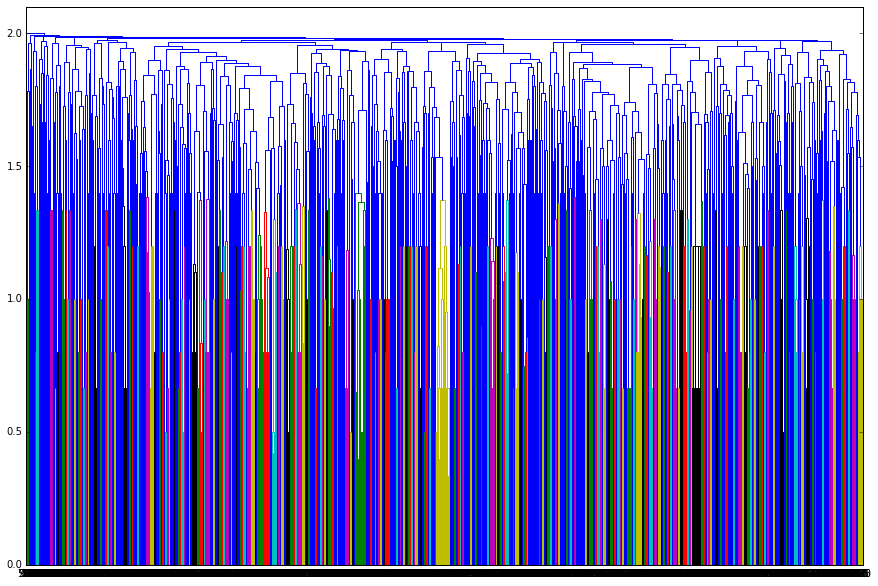

In [186]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(15, 10))
Z = dendrogram(clustering.linkage_)
plt.show()

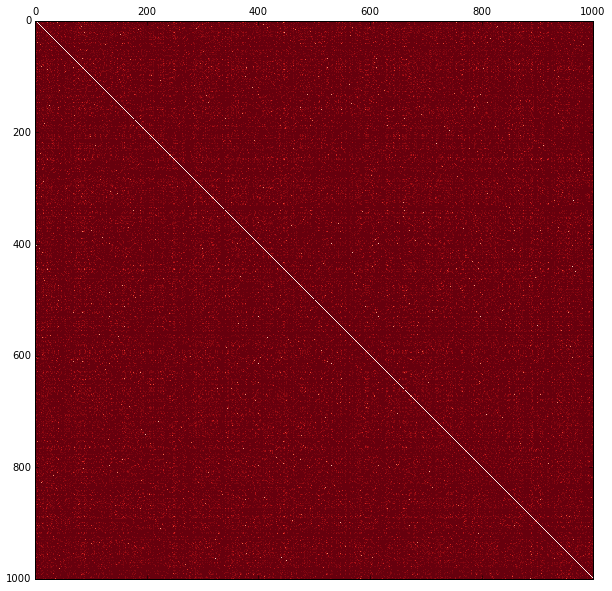

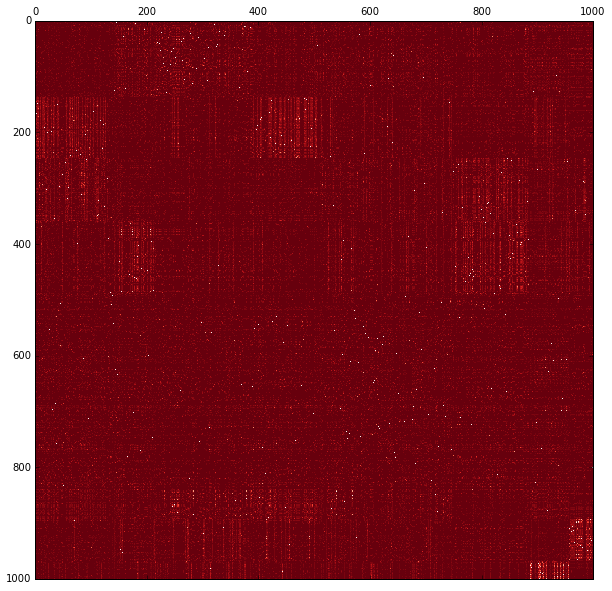

In [187]:
from sklearn.metrics import pairwise_distances
from sklearn.cluster.bicluster import SpectralCoclustering

# Normal
X_aff = pairwise_distances(X, metric="cityblock")
plt.matshow(X_aff, cmap=plt.cm.Reds)

# Biclustered
model = SpectralCoclustering(n_clusters=8)
model.fit(X_aff)

X_aff = X_aff[np.argsort(model.row_labels_)]
X_aff = X_aff[:, np.argsort(model.column_labels_)]

plt.matshow(X_aff, cmap=plt.cm.Reds)

# Cut and visualize the projection

In [194]:
threshold = 1.5
clustering.set_params(n_clusters=None)
clustering.set_params(threshold=threshold)
labels = clustering.labels_
n_labels = len(np.unique(labels))

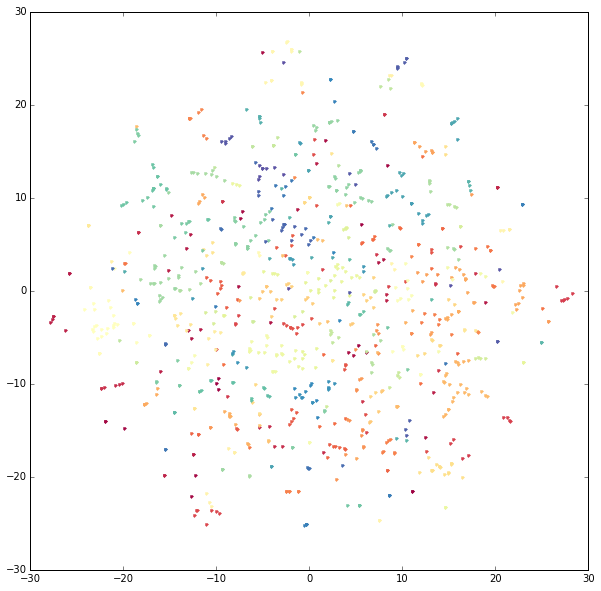

In [195]:
from sklearn.manifold import TSNE

model = TSNE(metric="cityblock")
coords = model.fit_transform(X)

cm = plt.get_cmap("Spectral")
colors =  (cm(1. * i / n_labels) for i in range(n_labels))
plt.figure()

for k, c in zip(np.unique(labels), colors):
    plt.plot(coords[labels == k, 0], coords[labels == k, 1], '.', label=k, color=c)

plt.show()

In [196]:
for i in range(n_labels):
    print(i, data[labels == i])

0 ['HUGH' 'HUGO']
1 ['DOUGLAS' 'DOUG']
2 ['GLADYS']
3 ['GUY']
4 ['GAIL' 'ABIGAIL']
5 ['CRAIG']
6 ['JAIME' 'AIMEE']
7 ['KIM' 'JIM' 'TIM']
8 ['BLAKE' 'JAKE']
9 ['MIKE']
10 ['TODD']
11 ['LUKE']
12 ['IGNACIO']
13 ['OPAL']
14 ['HOPE']
15 ['LUCY' 'LUCAS' 'LUCIA']
16 ['GUADALUPE']
17 ['LUPE']
18 ['RAY' 'JAY' 'KAY' 'MAY']
19 ['FAYE']
20 ['LUZ']
21 ['WAYNE' 'DWAYNE']
22 ['LYNN' 'LYNDA' 'LYNNE']
23 ['CLYDE' 'LYDIA']
24 ['EMILY']
25 ['JOE' 'JOEL' 'JOEY' 'NOEL']
26 ['JOY' 'JO']
27 ['JOYCE']
28 ['JUDY' 'RUDY']
29 ['CODY' 'JODY' 'JODI']
30 ['BROOKE']
31 ['ROOSEVELT']
32 ['JOSE' 'JOSHUA' 'JOSH']
33 ['JOSEPH' 'JOSEPHINE']
34 ['JOSEFINA']
35 ['ROSIE' 'JOSIE']
36 ['ROSE' 'ROSA' 'ROSS']
37 ['ROSEMARY' 'ROSEMARIE']
38 ['ROSARIO']
39 ['LLOYD' 'FLOYD']
40 ['ROY' 'TROY' 'LEROY']
41 ['PEDRO']
42 ['WOODROW']
43 ['NIKKI']
44 ['ROBIN' 'ROBYN']
45 ['TOBY']
46 ['DEBBIE' 'BOBBIE' 'ROBBIE']
47 ['BOBBY' 'BOB']
48 ['JACK' 'JACKIE' 'MACK']
49 ['JACOB']
50 ['RUBY' 'RUBEN']
51 ['RUTH']
52 ['RUFUS']
53 ['AMY' 'SAM' 'PAM']